In [1]:
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Tuning Parameter
from sklearn.model_selection import GridSearchCV

import pickle

# Import Model SVM From Scratch
import svm

In [2]:
df = pd.read_csv('dataset/data_final.csv')
df = df.iloc[:, 1:]

df

,KIP,Status Orang Tua Siswa,Penghasilan Orang Tua,Data Dinas Sosial,Target
0,Tidak ada,Lengkap,Diatas 1 Juta,Normal,Tidak
1,Ada,Lengkap,Tidak Berpenghasilan,Rentang Miskin,Ya
2,Tidak ada,Yatim Piatu,Diatas 1 Juta,Normal,Tidak
3,Tidak ada,Lengkap,Tidak Berpenghasilan,Miskin,Ya
4,Tidak ada,Lengkap,Diatas 1 Juta,Normal,Tidak
...,...,...,...,...,...
105,Ada,Yatim Piatu,Tidak Berpenghasilan,Rentang Miskin,Ya
106,Tidak ada,Lengkap,Diatas 1 Juta,Normal,Tidak
107,Tidak ada,Yatim / Piatu,Tidak Berpenghasilan,Rentang Miskin,Ya
108,Tidak ada,Lengkap,Diatas 1 Juta,Normal,Tidak


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   KIP                     110 non-null    object
 1   Status Orang Tua Siswa  110 non-null    object
 2   Penghasilan Orang Tua   110 non-null    object
 3   Data Dinas Sosial       110 non-null    object
 4   Target                  110 non-null    object
dtypes: object(5)
memory usage: 4.4+ KB


In [4]:
columns = df.columns
for i in range(len(columns)):
    print(f"=== {columns[i]}")
    print(df[columns[i]].value_counts())
    print()


=== KIP
Tidak ada    74
Ada          36
Name: KIP, dtype: int64

=== Status Orang Tua Siswa
Lengkap          66
Yatim Piatu      22
Yatim / Piatu    22
Name: Status Orang Tua Siswa, dtype: int64

=== Penghasilan Orang Tua
Diatas 1 Juta           48
Dibawah 1 Juta          35
Tidak Berpenghasilan    27
Name: Penghasilan Orang Tua, dtype: int64

=== Data Dinas Sosial
Normal            50
Miskin            32
Rentang Miskin    28
Name: Data Dinas Sosial, dtype: int64

=== Target
Ya       60
Tidak    50
Name: Target, dtype: int64



Replace data with numerik

In [5]:

df['KIP'] = df['KIP'].replace({'Tidak ada' : 0, 'Ada' : 1})
df['Status Orang Tua Siswa'] = df['Status Orang Tua Siswa'].replace({'Lengkap' : 0.5, 'Yatim Piatu' : 1, 'Yatim / Piatu' : 0.75})
df['Penghasilan Orang Tua'] = df['Penghasilan Orang Tua'].replace({'Diatas 1 Juta' : 0.5, 'Dibawah 1 Juta' : 0.75, 'Tidak Berpenghasilan' : 1})
df['Data Dinas Sosial'] = df['Data Dinas Sosial'].replace({'Normal' : 0.5, 'Miskin' : 1, 'Rentang Miskin' : 0.75})
df['Target'] = df['Target'].replace({'Ya' : 1, 'Tidak' : 0})

df['Status Orang Tua Siswa'] = df['Status Orang Tua Siswa'].astype(float)
df['Penghasilan Orang Tua'] = df['Penghasilan Orang Tua'].astype(float)
df['Data Dinas Sosial'] = df['Data Dinas Sosial'].astype(float)
df

,KIP,Status Orang Tua Siswa,Penghasilan Orang Tua,Data Dinas Sosial,Target
0,0,0.50,0.50,0.50,0
1,1,0.50,1.00,0.75,1
2,0,1.00,0.50,0.50,0
3,0,0.50,1.00,1.00,1
4,0,0.50,0.50,0.50,0
...,...,...,...,...,...
105,1,1.00,1.00,0.75,1
106,0,0.50,0.50,0.50,0
107,0,0.75,1.00,0.75,1
108,0,0.50,0.50,0.50,0


# Visualisasi

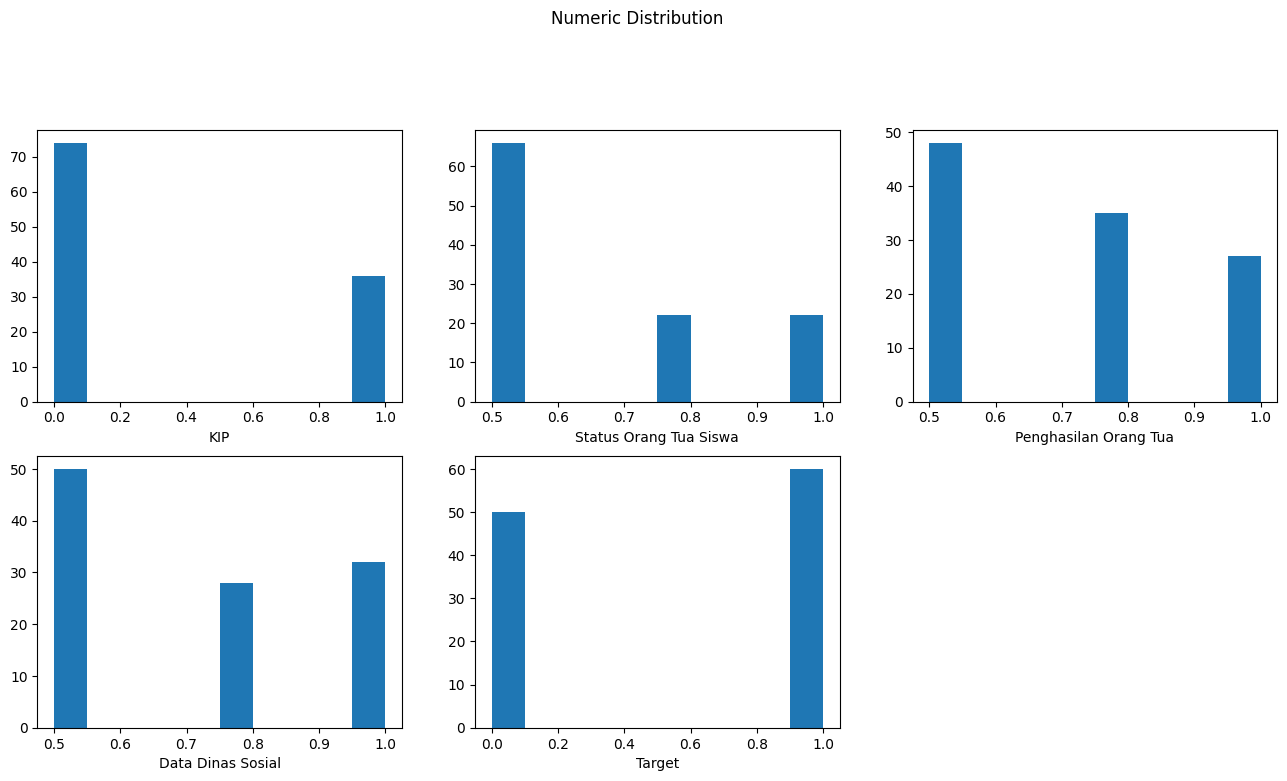

In [6]:
numeric_data = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(16,12))
idx = 1
for i in numeric_data:
    plt.subplot(3,3,idx)
    plt.hist(df[i])
    idx += 1
    plt.xlabel(i)
plt.suptitle("Numeric Distribution")
plt.show()

# Model SVM

In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Training

In [8]:
clf = svm.SVM(Iteration=1000)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

# Testing

In [9]:
list_predict = []
for i in range(len(df)):
    data = df.iloc[i, :-1].values
    predict = clf.predict(data)
    if predict == 1:
        list_predict.append(1)
    else:
        list_predict.append(0)

df['prediksi'] = list_predict

In [10]:
df

,KIP,Status Orang Tua Siswa,Penghasilan Orang Tua,Data Dinas Sosial,Target,prediksi
0,0,0.50,0.50,0.50,0,0
1,1,0.50,1.00,0.75,1,1
2,0,1.00,0.50,0.50,0,0
3,0,0.50,1.00,1.00,1,1
4,0,0.50,0.50,0.50,0,0
...,...,...,...,...,...,...
105,1,1.00,1.00,0.75,1,1
106,0,0.50,0.50,0.50,0,0
107,0,0.75,1.00,0.75,1,1
108,0,0.50,0.50,0.50,0,0


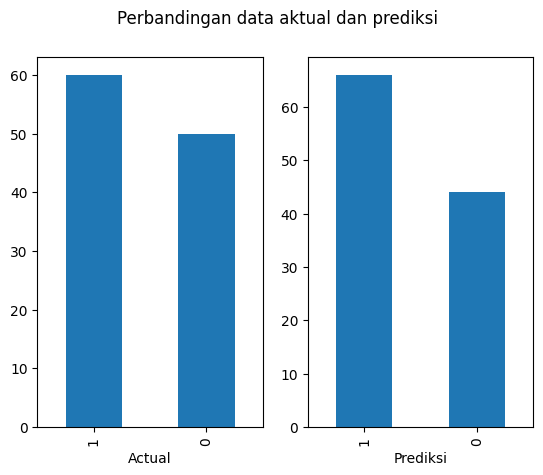

In [11]:
plt.subplot(1, 2, 1)
df['Target'].value_counts().plot(kind='bar')
plt.xlabel("Actual")

plt.subplot(1, 2, 2)
df['prediksi'].value_counts().plot(kind='bar')
plt.xlabel("Prediksi")

plt.suptitle("Perbandingan data aktual dan prediksi")
plt.show()

In [13]:
aktual = df['Target'].value_counts()
prediksi = df['prediksi'].value_counts()

print(f"===== Data Aktual\n{aktual}\n\n===== Data Prediksi\n{prediksi}")

===== Data Aktual
1    60
0    50
Name: Target, dtype: int64

===== Data Prediksi
1    66
0    44
Name: prediksi, dtype: int64


# Accuracy

In [38]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1

    return correct / float(len(actual)) * 100.0

accuracy = accuracy_metric(df['Target'], df['prediksi'])
print("Akurasi Model : {:.2f} %".format(accuracy))

Akurasi Model : 94.55 %


In [39]:
pickle.dump(clf, open('Models/model_beasiswa_svm.pkl', 'wb'))

In [41]:
# loaded_model = pickle.load(open('Models/model_beasiswa_svm.pkl', 'rb'))